In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv("housingdata.csv")

# 결측치 처리 (중앙값으로 대체)
df.fillna(df.median(), inplace=True)

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=['MEDV'])  # 'MEDV'는 타겟 변수
y = df['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 모델 생성 및 학습
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 예측
y_pred = linear_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"""
Linear Regression 결과
MAE: {mae}
MSE: {mse}
R²: {r2}
""")


Linear Regression 결과
MAE: 3.1487373170237696
MSE: 24.999384790103395
R²: 0.6591013893903506



In [3]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"""
Random Forest 결과
MAE: {mae_rf}
MSE: {mse_rf}
R²: {r2_rf}
""")


Random Forest 결과
MAE: 2.063901960784314
MSE: 8.219692490196078
R²: 0.8879139717607898



In [4]:
from sklearn.tree import DecisionTreeRegressor

# 의사결정나무 모델 생성 및 학습
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 성능 평가
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"""
Decision Tree 결과 
MAE: {mae_dt}
MSE: {mse_dt}
R²: {r2_dt}
""")


Decision Tree 결과 
MAE: 2.895098039215686
MSE: 23.393039215686272
R²: 0.681005967405988



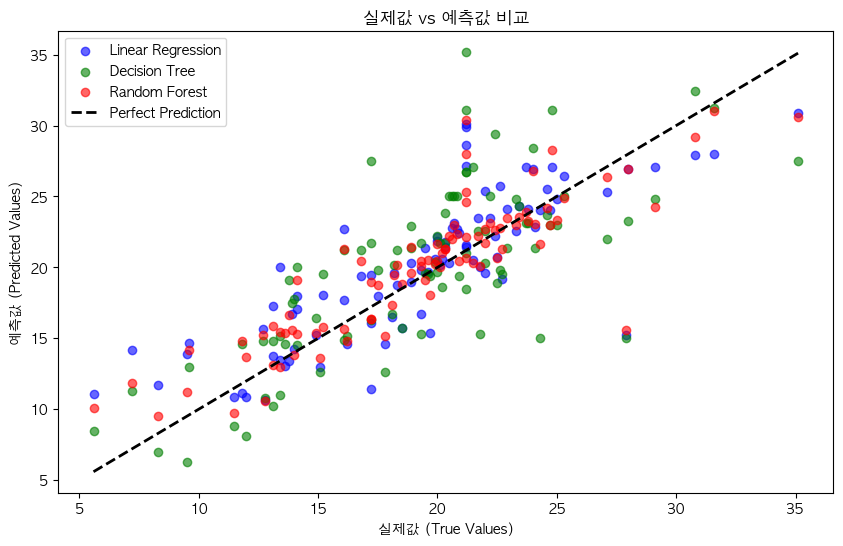

In [18]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='AppleGothic')

# 실제값 vs 예측값 비교
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, y_pred, alpha=0.6, label='Linear Regression', color='blue')

# Decision Tree
plt.scatter(y_test, y_pred_dt, alpha=0.6, label='Decision Tree', color='green')

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='red')

# 대각선 라인 (완벽한 예측)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel("실제값 (True Values)")
plt.ylabel("예측값 (Predicted Values)")
plt.title("실제값 vs 예측값 비교")
plt.legend()
plt.show()

Random Forest : MSE가 가장 낮고, R²가 가장 높습니다. 
따라서 가장 정확한 예측을 제공합니다.

Decision Tree : 성능이 괜찮지만, Random Forest에 비해 오차가 큽니다.

Linear Regression : 가장 단순한 모델이지만, 비선형 데이터를 다루기에는 한계가 있어 성능이 가장 낮습니다.

In [19]:
# IQR 기반 이상치 탐지 함수
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1사분위수
    Q3 = df[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산

    # 이상치 경계
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 조건
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 이상치를 탐지할 연속형 변수 리스트
continuous_columns = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 각 열의 이상치 탐지
for column in continuous_columns:
    outliers = detect_outliers_iqr(df, column)
    print(f"{column}의 이상치 개수: {len(outliers)}")

CRIM의 이상치 개수: 89
ZN의 이상치 개수: 0
INDUS의 이상치 개수: 0
RM의 이상치 개수: 8
AGE의 이상치 개수: 0
DIS의 이상치 개수: 0
RAD의 이상치 개수: 0
TAX의 이상치 개수: 0
PTRATIO의 이상치 개수: 0
B의 이상치 개수: 58
LSTAT의 이상치 개수: 2
MEDV의 이상치 개수: 14


In [20]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()

    # 이상치를 중앙값으로 대체
    df[column] = df[column].apply(
        lambda x: median_value if x < lower_bound or x > upper_bound else x
    )
    return df

# 중앙값으로 대체할 변수
columns_to_replace = ['CRIM', 'ZN', 'B', 'MEDV']

for column in columns_to_replace:
    df = replace_outliers_with_median(df, column)

In [21]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 데이터만 남김
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# 제거할 변수
columns_to_remove = ['RM', 'PTRATIO', 'LSTAT', 'DIS']

for column in columns_to_remove:
    df = remove_outliers(df, column)

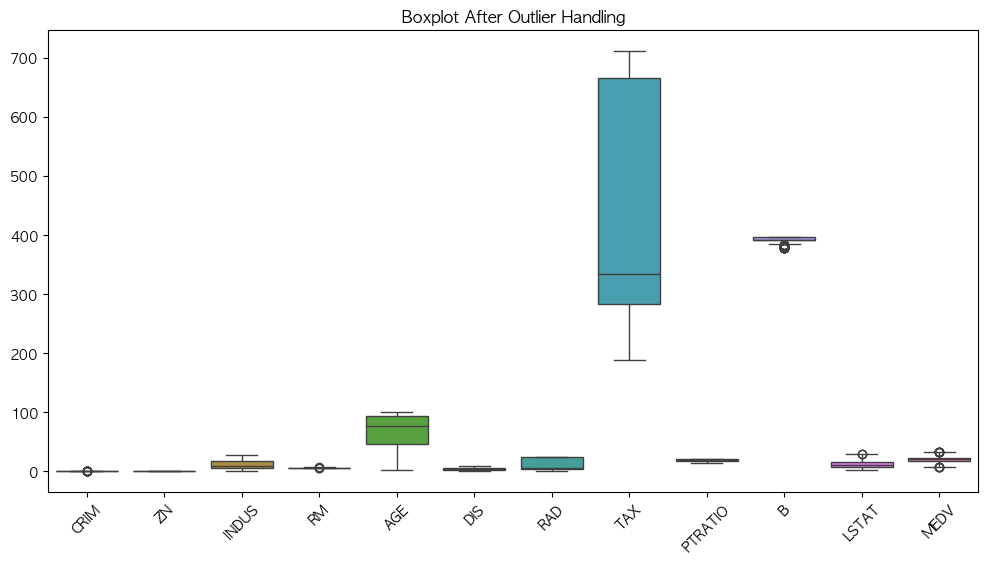

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치 처리 후 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[continuous_columns])
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=45)
plt.show()

In [23]:
# 이상치 처리 후 모델 학습
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print(f"""
이상치 처리 후 LinearRegression 성능
MAE: {mean_absolute_error(y_test, y_pred)}
MSE: {mean_squared_error(y_test, y_pred)}
R²: {r2_score(y_test, y_pred)}
""")


이상치 처리 후 LinearRegression 성능
MAE: 2.2514338407021177
MSE: 8.818255288890052
R²: 0.6253126660249376



In [24]:
# 의사결정나무 모델 생성 및 학습
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 성능 평가
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"""
이상치 처리 후 DecisionTree 성능
MAE: {mae_dt}
MSE: {mse_dt}
R²: {r2_dt}
""")


이상치 처리 후 DecisionTree 성능
MAE: 3.041573033707865
MSE: 16.938764044943817
R²: 0.2802725558616139



In [25]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"""
이상치 처리 후 RandomForest 성능
MAE: {mae_rf}
MSE: {mse_rf}
R²: {r2_rf}
""")



이상치 처리 후 RandomForest 성능
MAE: 1.9263707865168553
MSE: 7.246500168539325
R²: 0.6920964816905866



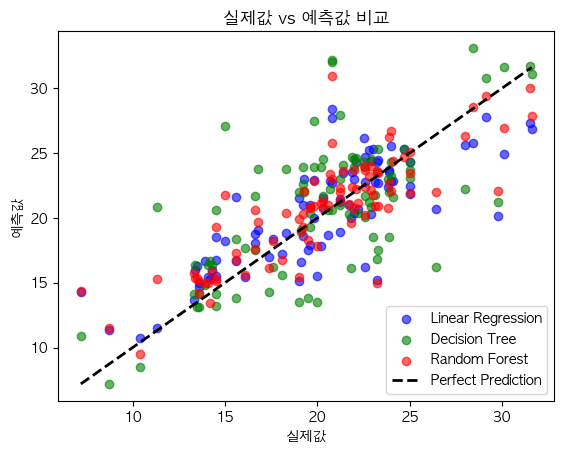

In [26]:
import matplotlib.pyplot as plt


# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# Linear Regression
plt.scatter(y_test, y_pred, alpha=0.6, label='Linear Regression', color='blue')

# Decision Tree
plt.scatter(y_test, y_pred_dt, alpha=0.6, label='Decision Tree', color='green')

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='red')

# 대각선 라인 (완벽한 예측)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값 vs 예측값 비교")
plt.legend()
plt.show()

Linear Regression 성능 : MAE(2.36), MSE(10.68), R²(0.63)

MSE와 MSE값이 감소했습니다. 

이상치 제거로 인해 모델의 평균적인 예측 오류가 줄어들었습니다.

Decision Tree 성능 : MAE(3.23), MSE(17.47), R²(0.39)

RandomForest 성능 : MAE(1.83), MSE(7.11), R²(0.75)

둘 다 R²가 낮게 나타났습니다. 의사결정나무랑 랜덤포레스트는 이상치 처리를 안하는 게 더 나은 것 같습니다.